In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [116]:
df = pd.read_csv('data_income_edited.csv')

In [117]:
l = ['gender','age','income','virgin','friends','social_fear','attempt_suicide']

In [118]:
restricted_df = df[l]

In [119]:
N,C = restricted_df.shape
for i in range(N):
    for j in range(C):
        if restricted_df.iloc[i,j] in ['Male','Yes','Transgender male']: 
            restricted_df.set_value(i, restricted_df.columns[j], 1)
        elif restricted_df.iloc[i,j] in ['Female','No','Transgender female']:
            restricted_df.set_value(i, restricted_df.columns[j], 0)
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [120]:
# spher-izing
#%debug
data_mat = restricted_df.values.astype('float')
means = np.mean(data_mat, axis = 0)
std_devs = np.std(data_mat,axis = 0)
norm_data_mat = (data_mat-means)/std_devs


In [133]:
depressed_vec = df['depressed'].values
for i in range(len(depressed_vec)):
    if depressed_vec[i] == 'Yes':
        depressed_vec[i] = 1
    if depressed_vec[i] == 'No':
        depressed_vec[i] = 0

In [80]:
e_vals,e_vecs = np.linalg.eig(norm_data_mat.T@norm_data_mat)

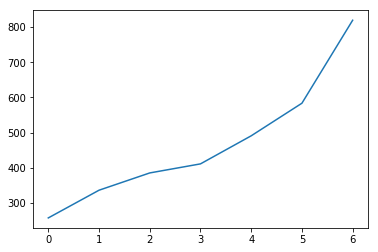

In [93]:
e_vals.sort()
plt.plot(e_vals)

In [94]:
e_vecs[:,0]

array([-0.11254974,  0.56814326,  0.53992725, -0.49133225,  0.23559905,
       -0.27557175, -0.01304858])

In [27]:
from sklearn.linear_model import LogisticRegression as LogReg

In [143]:
import statsmodels
import statsmodels.api as sm

In [144]:
depressed_vec = depressed_vec.astype('float')

In [152]:
model = sm.Logit(endog=depressed_vec,exog=sm.add_constant(data_mat))

In [153]:
results =  model.fit()

Optimization terminated successfully.
         Current function value: 0.560512
         Iterations 6


In [154]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  469
Model:                          Logit   Df Residuals:                      461
Method:                           MLE   Df Model:                            7
Date:                Sat, 01 Dec 2018   Pseudo R-squ.:                  0.1228
Time:                        01:43:12   Log-Likelihood:                -262.88
converged:                       True   LL-Null:                       -299.67
                                        LLR p-value:                 2.793e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9122      0.648     -2.950      0.003      -3.183      -0.642
x1             0.4570      0.298      1.534      0.125      -0.127       1.041
x2             0.0425      0.021      2.024      0.0

In [168]:
input_data = np.array([0.5]*8,dtype='float')
pred = 1/(1+np.exp(-np.sum(results.params*input_data)))

In [170]:
results.predict(exog=input_data)

array([0.70812899])